# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

For this dataproject I will analyse the relationship between the interest rate and the savings-investments. The reason for this is for the reason years where central banks around the world decided to keep interest rates low and even negative to keep the economy for entering a liquidity trap. During this period the fear of high savings and not as high investments helped with decision of lowering the interest rate to the negatives. I will here create data plots and transformation to see if I can find the relationship. I’m here using data from Denmark and I will be using the savings and investments and the discount interest rate, which is the signal rate the central bank uses. All of it we be in quarterly data.

0       0.1
1       0.7
2       6.1
3       2.8
4       2.7
      ...  
90    147.0
91    153.9
92    157.2
93    181.0
94    164.2
Name: S, Length: 95, dtype: float64
0     46.3
1     43.2
2     43.4
3     41.8
4     43.6
      ... 
90    26.1
91    38.1
92    59.1
93    54.9
94    50.6
Name: I, Length: 95, dtype: float64
0     9.50
1     9.00
2     9.50
3     9.50
4     9.50
      ... 
90   -0.50
91   -0.60
92   -0.60
93   -0.60
94    0.65
Name: r, Length: 95, dtype: float64


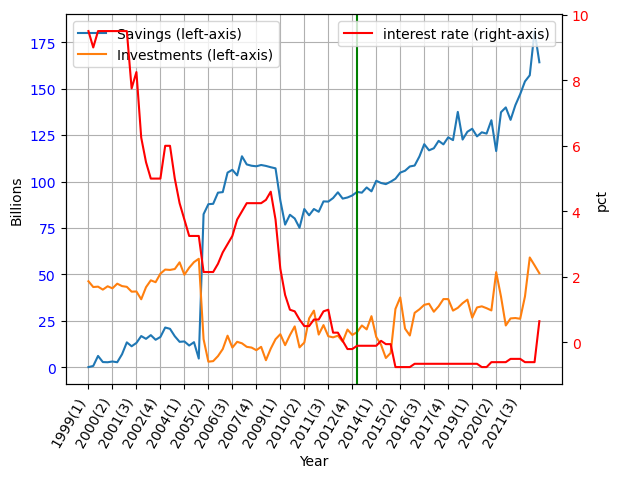

In [129]:


# Read the Excel sheet into a Pandas DataFrame
df = pd.read_excel('dataprj.xlsx', sheet_name='Sheet 1')

# Access the columns of the DataFrame
Year = df['Year']
S = df['S']
I = df['I']
r = df['r']

print(S)
print(I)
print(r)

# Create a figure with two y-axes
fig, ax1 = plt.subplots()

# Plot S and I on the first y-axis
ax1.plot(Year, S, label='Savings (left-axis)')
ax1.plot(Year, I, label='Investments (left-axis)')


# Set the label and color of the first y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Billions')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot r on the second y-axis
ax2.plot(Year, r, color='red', label='interest rate (right-axis)')

# Set the label and color of the second y-axis
ax2.set_ylabel('pct')
ax2.tick_params(axis='y', labelcolor='red')

# this indicates the time when in intrest rates turn negative.
ax1.axvline(x=Year.iloc[56], color='green')

# Set the x-tick locations and labels
ax1.set_xticks(Year)
ax1.set_xticklabels(Year, rotation=60, ha='right')

# Set the x-tick frequency to every 5th quarter
ax1.xaxis.set_ticks(Year[::5])

# Show legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(True)
# Show the plot
plt.show()


From this first figure it can be very hard to find the relationship especially during the period where the interest rates turn negative, which is after the green line. I will here use two transformations the log growth and the fourth difference to get the yearly change. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [130]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

NameError: name 'venn2' is not defined

<Figure size 1500x700 with 0 Axes>

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

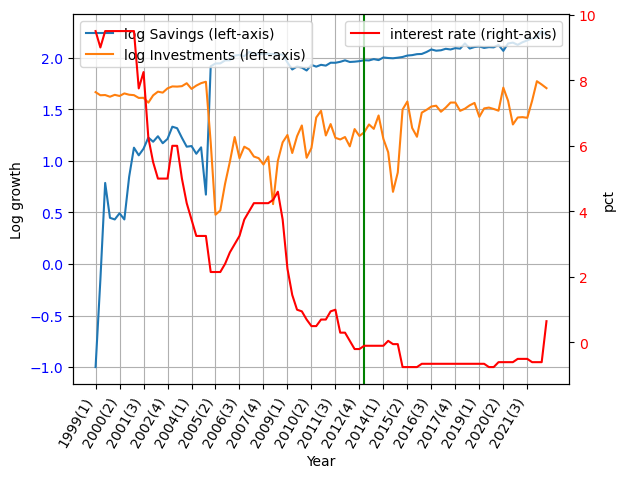

In [137]:
# Creating the figure for the log
fig, ax1 = plt.subplots()

y1_data = np.log10(df['S'])
y2_data = np.log10(df['I'])

# Plot S and I on the first y-axis
ax1.plot(Year, y1_data, label='log Savings (left-axis)')
ax1.plot(Year, y2_data, label='log Investments (left-axis)')


# Set the label and color of the first y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Log growth')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot r on the second y-axis
ax2.plot(Year, r, color='red', label='interest rate (right-axis)')

# Set the label and color of the second y-axis
ax2.set_ylabel('pct')
ax2.tick_params(axis='y', labelcolor='red')

# this indicates the time when in intrest rates turn negative.
ax1.axvline(x=Year.iloc[56], color='green')

# Set the x-tick locations and labels
ax1.set_xticks(Year)
ax1.set_xticklabels(Year, rotation=60, ha='right')

# Set the x-tick frequency to every 5th quarter
ax1.xaxis.set_ticks(Year[::5])

# Show legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(True)
# Show the plot
plt.show()

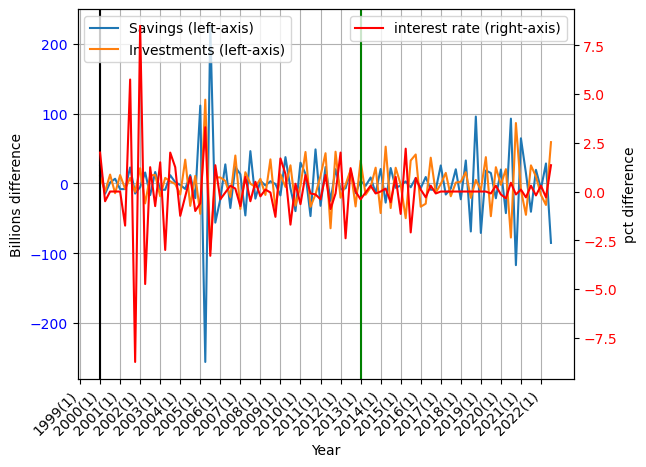

In [ ]:
#to find a more precise plot I will take the fourth difference of all the variables.
S_diff = S.diff().diff().diff().diff()
I_diff = I.diff().diff().diff().diff()
r_diff = r.diff().diff().diff().diff()


#I will use this to make a new plot.

fig, ax1 = plt.subplots()

# Plot the fourth difference of S and I on the first y-axis
ax1.plot(Year, S_diff, label='Savings (left-axis)')
ax1.plot(Year, I_diff, label='Investments (left-axis)')

# Set the label and color of the first y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Billions difference')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the fourth difference of r on the second y-axis
ax2.plot(Year, r_diff, color='red', label='interest rate (right-axis)')

# Set the label and color of the second y-axis
ax2.set_ylabel('pct difference')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-tick locations and labels
ax1.set_xticks(Year.index[::4])
ax1.set_xticklabels(Year[::4], rotation=45, ha='right')

# This indicates the time when in intrest rates turn negative.
ax1.axvline(x=Year.iloc[56], color='green')
ax1.axvline(x=Year.iloc[4], color='black')

# Show legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
# Show the plot
plt.show()


# Conclusion

From all these data plots it is not clear that there even is a relationship between the variables. The important thing is that it almost looks like there is no effect of the central bank lowering the interest rate. it might actually look like it has more of a hampering effect on the savings as they have continued to increase of they were implemented. There is off course many reasons for why this could be happening a reason could be because there are several macroeconomic variables that all will either contribute or hinder the investments and savings. These could have a larger effect than the interest rate which is why the effect on the variables is almost insignificant. Another explanation could be because of reversal interest rates which means that because of the central bank has kept the interest rate so low and the difference between the low interest rate and the negative is marginal. The effect will be non-existent as households will not notice the lowering of the interest rate or won’t care since their marginal cost from saving is not below there utility of investing their savings. It could be a mixture between explanations and there would have be further analysis to find the reason for why we can’t observe this relationship.ADD CONCISE CONLUSION.